<h1 style="text-align:center; font-family:courier; font-size:300%">News Classification (LSTM)</h1>

In [1]:
import pandas as pd
import numpy as np

import string

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashanthsingaravelan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, Dropout, GlobalMaxPool1D
from tensorflow.keras import Model

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
vocab_size    = 1000
embedding_dim = 16
max_length    = 120
trunc_type    = 'post'
padding_type  = 'post'
oov_tok       = ""
training_portion = .8

In [6]:
## category is present
df_train = pd.read_csv('data-sets/BBC News Train.csv')
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [7]:
## category is not present -> We need to find
df_test  = pd.read_csv('data-sets/BBC News Test.csv')
df_test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


## Split between Dependent and Independent variables

In [8]:
x = df_train['Text']
y = df_train['Category']

In [9]:
print(x)

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object


In [10]:
print(y)

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object


## Y-Variable (Category feature) --> Tokenisation + Vectorizer

In [11]:
lbl = LabelBinarizer()
y = lbl.fit_transform(y) ## category -> label encoding -> vector 

In [12]:
print(y)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [13]:
print(y)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]


## Split between Train and Test Data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## X-Variable (Category feature) --> Tokenisation + Vectorizer

In [15]:
max_features = 1000
tokenizer    = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(x))

In [16]:
### tokenisation + vectorization
tokenized_list_train = tokenizer.texts_to_sequences(x_train)
for i in range(4):
    print(tokenized_list_train[i])
    print("\n")

[47, 608, 137, 824, 47, 608, 875, 182, 1, 20, 222, 137, 3, 1, 115, 188, 468, 7, 3, 203, 824, 2, 441, 1, 110, 7, 114, 47, 566, 1, 46, 20, 39, 904, 2, 1, 4, 47, 657, 44, 1, 114, 566, 6, 1, 853, 3, 849, 4, 875, 407, 143, 3, 124, 104, 49, 546, 3, 244, 70, 47, 6, 34, 41, 7, 503, 473, 193, 182, 147, 21, 148, 4, 72, 230, 1, 365, 38, 63, 6, 244, 4, 20, 149, 237, 1, 4, 4, 1, 29, 44, 1, 3, 5, 216, 139, 548, 6, 124, 4, 38, 910, 624, 5, 543, 64, 11, 14, 477, 6, 1, 72, 6, 530, 682, 13, 15, 248, 52, 508, 137, 3, 1, 3, 203, 503, 10, 122, 29, 239, 69, 164, 5, 505, 9, 5, 5, 15, 13, 50, 3, 1, 2, 1, 14, 1, 379, 110, 714, 46, 13, 29, 44, 24, 6, 861, 17, 3, 115, 138, 110, 7, 658, 142, 13, 1, 407, 37, 248, 4, 5, 3, 1, 1, 25, 10, 47, 608, 731, 9, 136, 123, 2, 47, 15, 13, 578, 3, 110, 21, 193, 875, 299, 13, 339, 851, 27, 38, 607, 108, 102, 5, 829, 624, 1, 3, 1, 7, 658, 539, 5, 3, 42, 63, 158, 35, 30, 19, 32, 3, 8, 5, 910, 624, 13, 29, 44, 47, 608, 17, 32, 8, 6, 1, 3, 56, 1, 70, 2, 117, 161, 6, 1, 853, 830, 11

In [17]:
tokenized_list_test  = tokenizer.texts_to_sequences(x_test)
for i in range(4):
    print(tokenized_list_test[i])
    print("\n")

[417, 9, 47, 18, 353, 12, 46, 23, 16, 1, 111, 975, 411, 5, 3, 635, 12, 417, 1, 133, 1, 559, 12, 538, 326, 275, 58, 20, 2, 1, 105, 3, 6, 1, 429, 102, 34, 20, 902, 39, 225, 267, 13, 1, 503, 768, 3, 138, 517, 22, 671, 21, 209, 125, 63, 296, 6, 1, 184, 419, 4, 18, 149, 134, 6, 93, 375, 19, 4, 1, 30, 13, 50, 37, 5, 3, 12, 1, 41, 200, 417, 21, 3, 482, 106, 75, 90, 49, 75, 37, 76, 275, 75, 15, 37, 39, 2, 5, 24, 75, 69, 150, 15, 13, 704, 435, 2, 16, 6, 1, 589, 473, 307, 417, 4, 673, 307, 171, 3, 20, 3, 210, 106, 293, 4, 307, 20, 45, 39, 8, 1, 368, 6, 1, 429, 5, 635, 105, 3, 12, 417, 2, 367, 1, 63, 975, 44, 19, 5, 5, 234, 434, 1, 111, 81, 333, 8, 721, 6, 203, 18, 39, 391, 791, 333, 2, 644, 7, 3, 1, 1, 114, 332, 260, 231, 14, 477, 6, 640, 708, 4, 585, 87, 31, 243, 19, 1, 1, 417, 14, 333, 2, 87, 5, 19, 24, 14, 477, 27, 31, 6, 124]


[5, 12, 1, 18, 4, 635, 21, 6, 1, 786, 54, 65, 145, 5, 319, 346, 4, 6, 80, 1, 3, 981, 1, 876, 133, 35, 1, 169, 6, 1, 731, 18, 936, 32, 482, 359, 6, 1, 133, 84, 541, 36

## Padding

In [18]:
maxlen = 100
x_train = pad_sequences(tokenized_list_train, maxlen = maxlen)
for i in range(4):
    print(x_train[i])
    print("\n")

[ 41   7 853  44  22   4   6   1 137 169  57   3  44 895   1 110 255  21
  10 445 407  44 104  46  37   1  72   7  85 911 599   3 124  44   6   1
 853   1  44 636   8   8  91  29 435  44   3   1 137   6  38 751   6   3
 192  56   1  58  16  27 113 175   4 113 923  24 426  28  20  37   5  72
 137 338 624  39   5  12   5 184 142  56 199  16   8 512 456  93  19   5
 417 151  44 134   4   2  87   1 137 172]


[399   6   1 921   1 103  16   6   1 921  19 112  15  45   1 281   2 933
   1 775  84 292   7 453  33  33  37   2 142  78  48  44 469   1  84 292
 193 427 267   8 921 122  84  13   1 292   7 281   2  94 494   1 292  73
   1   4 702  29  44   4  15 254  99  21  30   7 652  10  32  36   6   1
  11  55 241  24  11  55  28  94  48  15  13  76  48  37  38  22 556   5
   3 627 256   1   8   9 111 686 210 530]


[  7  67   3  91 465  14  79   2   1  68 216   3   4 208  68 216   3 268
   7 159  14  12 968   2 514   7 216 163  24  58  28   1  61   1 243 268
   7  31 567  22 444   5 159   6 256

In [19]:
x_test  = pad_sequences(tokenized_list_test,  maxlen = maxlen)
for i in range(4):
    print(x_test[i])
    print("\n")

[ 15  13 704 435   2  16   6   1 589 473 307 417   4 673 307 171   3  20
   3 210 106 293   4 307  20  45  39   8   1 368   6   1 429   5 635 105
   3  12 417   2 367   1  63 975  44  19   5   5 234 434   1 111  81 333
   8 721   6 203  18  39 391 791 333   2 644   7   3   1   1 114 332 260
 231  14 477   6 640 708   4 585  87  31 243  19   1   1 417  14 333   2
  87   5  19  24  14 477  27  31   6 124]


[  6   1 731  18 936  32 482 359   6   1 133  84 541  36  16 340  19   5
 536   3  47 981  11  13  11  36 191  34  12  20 515  29  23 506  17   1
 391   1 191  32 300  12   1   1 153  18  39   6   1   4  11  58 594  32
  35  36 965 171   2 441   5   4 191  32 167   2   1  76  20  28  38  21
   1   4  20   1 915   3   1 226   2   1 446 935  33  25 458  19  26 239
  69 277  46   9 225  24   1  25  49  13]


[  3   1  41 221  14 413   3   8 100 211   4 621 307  26 128   2  62  13
   2   1  41 200  62  25   5  60  26 219 190   1  62  25   4 190   1  62
  25  64  26 219  26  23 277  10  26

## Model Creation

In [20]:
embed_size = 128    
def create_model():
    input = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(input)
    x = LSTM(64, return_sequences=True)(x)
    x = GlobalMaxPool1D()(x)

    x = Dense(50, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(5, activation="softmax")(x)    

    return Model(inputs=input, outputs=x)

In [21]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          128000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           49408     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                             

## Fitting the Data into the model

In [23]:
hist = model.fit(x_test, y_train, batch_size=32, epochs=12, validation_split=0.1)
hist

Epoch 1/12


2022-11-14 22:12:49.125593: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 1s 66ms/step - loss: 1.6098 - accuracy: 0.1978 - val_loss: 1.6145 - val_accuracy: 0.2000
Epoch 2/12
9/9 [==============================] - 0s 43ms/step - loss: 1.5946 - accuracy: 0.3060 - val_loss: 1.6179 - val_accuracy: 0.2000
Epoch 3/12
9/9 [==============================] - 0s 42ms/step - loss: 1.5845 - accuracy: 0.3470 - val_loss: 1.6232 - val_accuracy: 0.1333
Epoch 4/12
9/9 [==============================] - 0s 43ms/step - loss: 1.5757 - accuracy: 0.3470 - val_loss: 1.6239 - val_accuracy: 0.2333
Epoch 5/12
9/9 [==============================] - 0s 43ms/step - loss: 1.5593 - accuracy: 0.4104 - val_loss: 1.6282 - val_accuracy: 0.2333
Epoch 6/12
9/9 [==============================] - 0s 42ms/step - loss: 1.5344 - accuracy: 0.4328 - val_loss: 1.6306 - val_accuracy: 0.2333
Epoch 7/12
9/9 [==============================] - 0s 41ms/step - loss: 1.5055 - accuracy: 0.5149 - val_loss: 1.6614 - val_accuracy: 0.2000
Epoch 8/12
9/9 [======================

## Accuracy Comparison

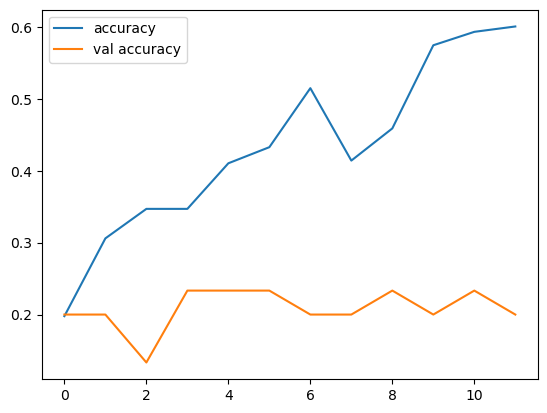

In [24]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Loss function comparison

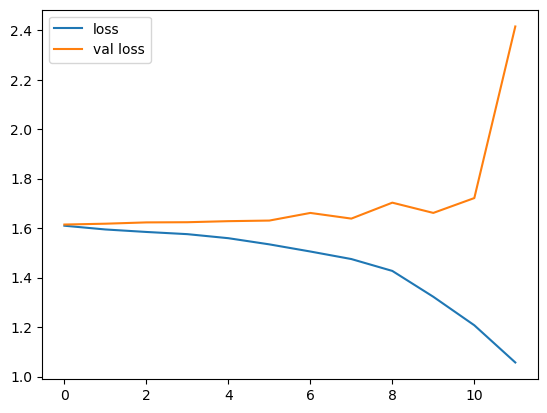

In [25]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Predicting the model with the test data

In [26]:
y_pred = model.predict(x_test, batch_size=32, verbose=1)
print(y_pred.shape)

10/10 [==============================] - 0s 12ms/step
(298, 5)


In [27]:
df_probs_all = pd.DataFrame(y_pred, columns=['business', 'entertainment', 'politics', 'sport', 'tech'])
df_probs_all.head()

,business,entertainment,politics,sport,tech
0,0.112278,0.563073,0.129609,0.093734,0.101306
1,0.262064,0.286884,0.224246,0.081935,0.144870
2,0.006315,0.110508,0.004065,0.838584,0.040527
3,0.947978,0.018360,0.021687,0.000209,0.011766
4,0.037807,0.457525,0.028691,0.387221,0.088757


## Cateogry with all the probabilities

In [28]:
def top_5_predictions(df, N):
    cols = df.columns[:-1].tolist()
    a    = df[cols].to_numpy().argsort()[:, :-N-1:-1]
    c    = np.array(cols)[a]
    d    = df[cols].to_numpy()[np.arange(a.shape[0])[:, None], a]
    df1  = pd.DataFrame(c).rename(columns=lambda x : f'max_{x+1}_col')
    predicted_genres = df1["max_1_col"] + ' ' + df1["max_2_col"]+ ' ' +df1["max_3_col"]+ ' ' + df1["max_4_col"]
    return predicted_genres

In [29]:
pred_gen = top_5_predictions(df_probs_all, 5)
pred_gen

0      entertainment politics business sport
1      entertainment business politics sport
2      sport entertainment business politics
3      business politics entertainment sport
4      entertainment sport business politics
                       ...                  
293    entertainment sport business politics
294    sport entertainment business politics
295    business entertainment politics sport
296    business entertainment politics sport
297    business entertainment politics sport
Length: 298, dtype: object

In [30]:
final_results = pd.DataFrame(columns=['text', 'keywords'])

In [31]:
for index, txt in enumerate(x_test):
    final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)

/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_3632/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_3632/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_3632/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipy

In [32]:
final_results

,text,keywords
0,"[15, 13, 704, 435, 2, 16, 6, 1, 589, 473, 307,...",entertainment politics business sport
1,"[6, 1, 731, 18, 936, 32, 482, 359, 6, 1, 133, ...",entertainment business politics sport
2,"[3, 1, 41, 221, 14, 413, 3, 8, 100, 211, 4, 62...",sport entertainment business politics
3,"[150, 48, 46, 319, 8, 91, 83, 223, 573, 953, 5...",business politics entertainment sport
4,"[35, 11, 73, 1, 529, 137, 91, 3, 252, 1, 70, 6...",entertainment sport business politics
...,...,...
293,"[2, 16, 259, 4, 97, 10, 45, 18, 5, 619, 105, 3...",entertainment sport business politics
294,"[5, 6, 975, 7, 24, 15, 1, 6, 4, 53, 107, 7, 6,...",sport entertainment business politics
295,"[631, 14, 508, 27, 4, 5, 248, 857, 19, 15, 64,...",business entertainment politics sport
296,"[5, 6, 343, 33, 6, 1, 79, 26, 474, 585, 44, 12...",business entertainment politics sport


In [33]:
test_data = ["""
The US says China will face harsh "consequences" if it aids Russia in its invasion of Ukraine, according to US media reports.
Unnamed officials reportedly told multiple US news outlets that Russia asked China to provide military assistance after it began the invasion.
The Chinese embassy in Washington said it was not aware of this request.
The warning comes ahead of a meeting in Rome on Monday between top US and China officials.
Since the start of the crisis Beijing has expressed strong rhetorical support for long-time ally Moscow, but is not publicly known to have provided any military or economic support.
However local media outlets citing US officials, say that Russia has in recent days asked China specifically for military equipment, including drones. China's response to that request is not known.
In a CNN interview, US National Security Adviser Jake Sullivan said they were "communicating directly, privately to Beijing that there will absolutely be consequences for large-scale sanctions evasion efforts or support to Russia to backfill them.
"We will not allow that to go forward and allow there to be a lifeline to Russia from these economic sanctions from any country, anywhere in the world."
He added that while the US believed China was aware that Russian leader Vladimir Putin was "planning something" before the invasion happened, Beijing "may not have understood the full extent of it".
"Because it's very possible that [Mr] Putin lied to them the same way that he lied to Europeans and others," Mr Sullivan said.
Mr Sullivan is due to meet Yang Jiechi, a member of China's top decision-making body the Politburo and the head of the Central Foreign Affairs Commission, on Monday in Rome.
Reuters news agency quoted a US official as saying that during the meeting Mr Sullivan will spell out the consequences and isolation China would face if it increased support for Russia.
Liu Pengyu, a spokesman for China's embassy in Washington DC, told US media that he had not heard of Russia's request. He added: "The high priority now is to prevent the tense situation from escalating or even getting out of control."
China so far has refrained from condemning Russia for the invasion, and has said Moscow's "legitimate security concerns" should be taken seriously.
Chinese state media and government officials, besides echoing Russia's official line that it is a "special military operation" and not an invasion, have also been repeating Russian disinformation claims about the war in recent days.
But Beijing at the same time has expressed "unwavering support" for Ukraine's sovereignty. It has also called for peace, and has said it is ready to help end the war through diplomacy. Several countries have urged China to do more to stop Russia's invasion.
"""]

In [34]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(test_data)
tokenized_list_real = tokenizer.texts_to_sequences(test_data)

In [35]:
x_real = pad_sequences(tokenized_list_real, maxlen=maxlen)
real_preds = model.predict(x_real)

1/1 [==============================] - 0s 11ms/step


In [36]:
real_preds = pd.DataFrame(real_preds,columns=['business', 'entertainment', 'politics', 'sport', 'tech'])
real_preds

,business,entertainment,politics,sport,tech
0,0.150024,0.283391,0.123433,0.243319,0.199833
